### ODE solvers

#### The Lorenz 63 "butterfly" plot 
( https://en.wikipedia.org/wiki/Lorenz_system )

Lorenz 63 is a system of 3 equations devepoed by Ed Lorenz ( https://en.wikipedia.org/wiki/Edward_Norton_Lorenz ) in build 54 in the 1960's, with computhing help from Ellen Fetter ( https://en.wikipedia.org/wiki/Ellen_Fetter ). The system is famous for being a very simple demonstration of a "chaotic" system. 

A chaotic system is a system in which a very small change in the initial conditions can get amplified in an unpredictable way so that two "trajectories" that are initially close separate to become very different. In a chaotic system, after some time, the difference between two similar but slight different initial trajectories is not proportional to the initial difference. 

Lorenz defined a system of 3 hypothetical variables, $x,y,z$ that vary in time, $t$ in relation to one another according to the equations

$$\begin{align}
\frac{dx}{dt} & =  \sigma(x-y)  \\
\frac{dy}{dt} & =  x(\rho-z)-y  \\
\frac{dz}{dt} & = xy-\beta z
\end{align}$$

with parameters, $\sigma, \rho, \beta$, constant in time.

In [11]:
# Lets write a function to evaluate the Lorenz 63 equations
def lorenz63( x, y, z, σ=10., ρ=28., β=8./3. ):
    """
    Function to evaluate the Lorenz 63 time derivative equation for a given current
    state and parameters.
    Arguments:
    x, y, z: x,y,z values.
    σ, ρ, β: static parameters α, ρ and β.
    """
    dxdt=σ*(y-x)
    dydt=x*ρ-x*z-y
    dzdt=x*y-β*z
    return dxdt,dydt,dzdt
?lorenz63  

Signature: lorenz63(x, y, z, σ=10.0, ρ=28.0, β=2.6666666666666665)
Docstring:
Function to evaluate the Lorenz 63 time derivative equation for a given current
state and parameters.
Arguments:
x, y, z: x,y,z values.
σ, ρ, β: static parameters α, ρ and β.
File:      /tmp/ipykernel_329501/4065766031.py
Type:      function


In [5]:
x,y,z=1,1,1;
dxdt,dydt,dzdt=lorenz63( x, y, z )
print(dxdt,dydt,dzdt)

0.0 26.0 -1.6666666666666665


For given initial conditions, we can simulate the time evolution of the Lorenz 63 system using the same sort
of timestepping we looked at in Lecture 1.
$$
\phi^{n+1}=\phi^{n}+\Delta t f(\phi^{n})
$$
this is not a very accurate numerical scheme (it is called an Euler forward scheme), so we will look at other schemes later. For illustrating programming concepts here it is usable.

In the Lorenz 63 case $\phi$ will be our array of time evolving values $x,y$ and $z$, and the function $f()$ can be our ``lorenz63`` Python function we just looked at.

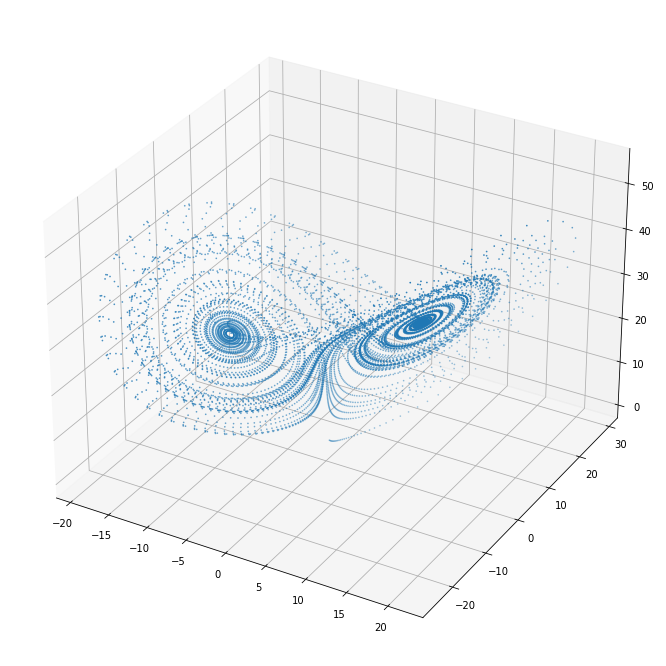

In [14]:
# Lets try this
import numpy as np
x0,y0,z0=0.,1.,1.05; Δt=0.01 # Initial conditions and paramters (note we need a discrete timestep)
nsteps=10000;
x=np.zeros(nsteps+1);x[0]=x0
y=np.zeros(nsteps+1);y[0]=y0
z=np.zeros(nsteps+1);z[0]=z0
for i in range(nsteps):
        dxdt,dydt,dzdt=lorenz63( x[i], y[i], z[i] )
        x[i+1]=x[i]+dxdt*Δt
        y[i+1]=y[i]+dydt*Δt
        z[i+1]=z[i]+dzdt*Δt
        
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.figure(figsize=(16, 12))
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,s=0.5);

In [ ]:
plt.plot(x);

In [6]:
# We can go a bit further with functions by defining a "timestepping" function for the Euler forward scheme we are using
# and passing the time-derivative function as an argument to a generic stepper.
def euler_forward_stepper(f, u0,nt,dt, params={}):
    """
    Function euler_forward_stepper steps forward for n steps a set of discrete ODE equations
    using an Euler forward scheme.
    Arguments:
    f: Function that returns time-derivative at current value of the state, u.
       f is expected to have each component of u as a separate argument, followed
       by keyword arguments for named parameters.
    u0: Initial values for the components of u
    nsteps: number of steps to take
    dt: time-step
    params: Dictionary of parameter settings, set using keywords.
    """
    # Set up initial state
    nf=len(u0)
    u=np.zeros( (nt+1,nf) )
    dudt=np.zeros( nf )
    for i in range(nf):
        u[0,i]=u0[i]
        
    # Step forward
    for n in range(nt):
        dudt=f(*u[n,:],**params)
        u[n+1,:]=u[n,:]+np.array(dudt)*dt
        
    # return result
    return u

In [7]:
nsteps=10000;
dt=0.01;
eps=1.e-4;
u0=euler_forward_stepper(lorenz63, np.array([0.,1.,1.05]), nsteps, dt);
u1=euler_forward_stepper(lorenz63, np.array([0.+eps,1.,1.05]), nsteps, dt);

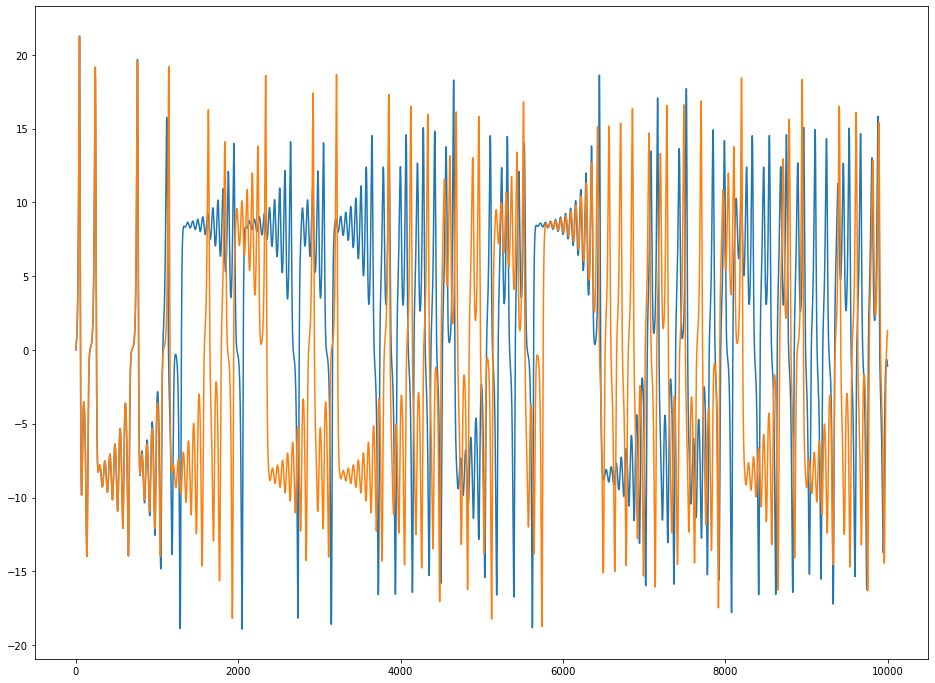

In [15]:
plt.figure(figsize=(16, 12))
plt.plot(u0[:,0]);plt.plot(u1[:,0]);

##### This plot demonstrates why computer weather forecasts get less accurate with time. Can you think why the plot shows this!

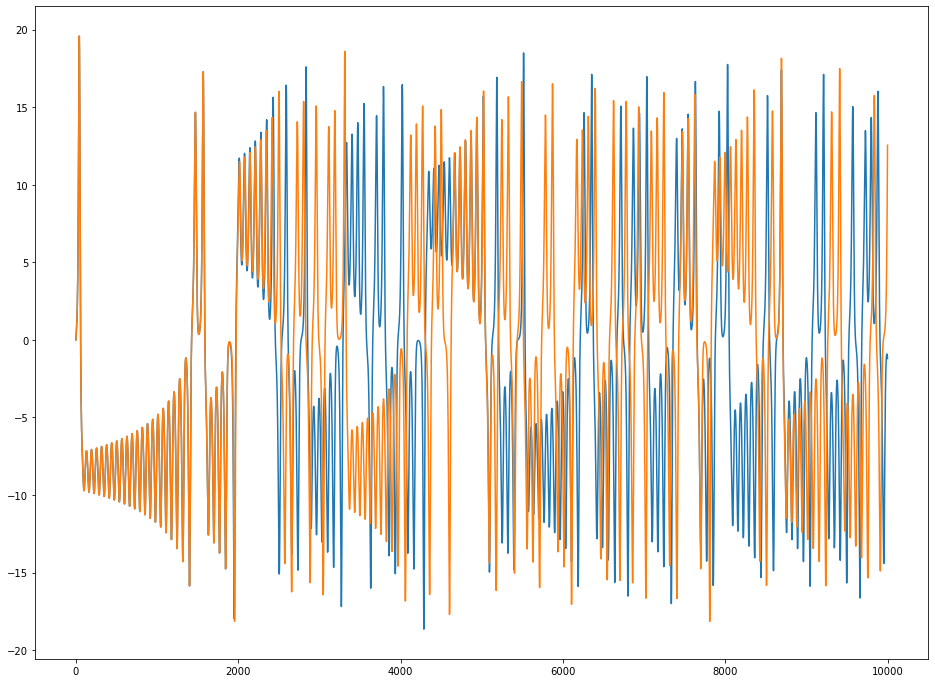

In [46]:
from scipy.integrate import odeint
def dfdy(y,t):
    return lorenz63( y[0], y[1], y[2] )
ys0=odeint(dfdy, np.array([0., 1., 1.05]), np.array([*range(0,10000)])*0.01)
ys1=odeint(dfdy, np.array([0.+eps, 1., 1.05]), np.array([*range(0,10000)])*0.01)

plt.figure(figsize=(16, 12))
plt.plot(ys0[:,0])
plt.plot(ys1[:,0])

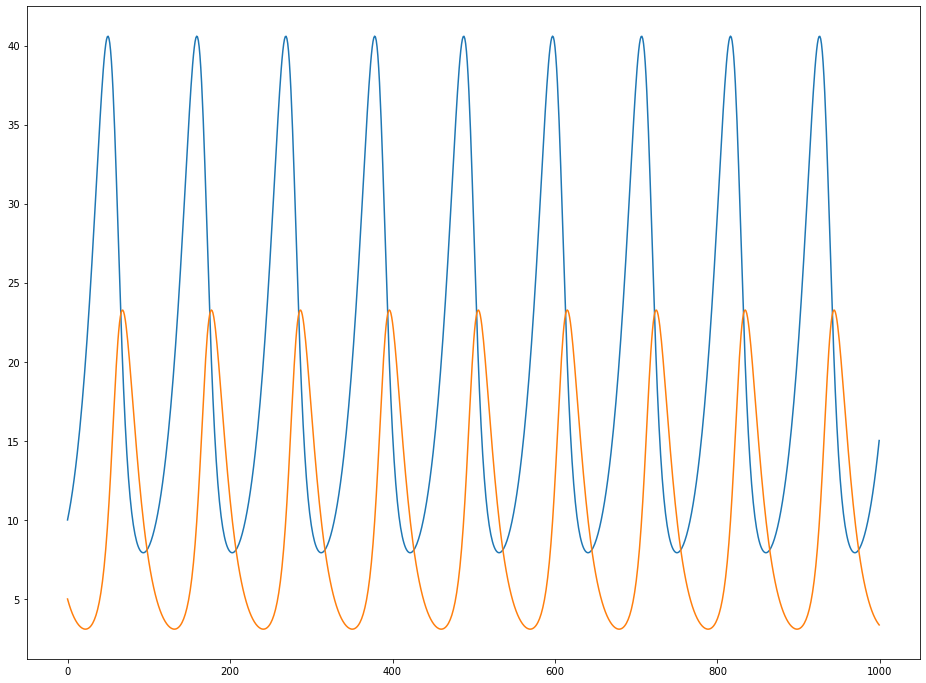

In [57]:
# Lotka-Volterra
def lv(y,t,α=1.,β=0.1,γ=1.5,ϵ=0.75):
    u_prey=y[0]
    v_pred=y[1]
    dudt =  α*u_prey - β*u_prey*v_pred
    dvdt = -γ*v_pred + ϵ*β*u_prey*v_pred
    return dudt, dvdt
ys=odeint(lv, np.array([10, 5]), np.linspace(0, 50, 1000) )
plt.figure(figsize=(16, 12))
plt.plot(ys[:,0])
plt.plot(ys[:,1]);

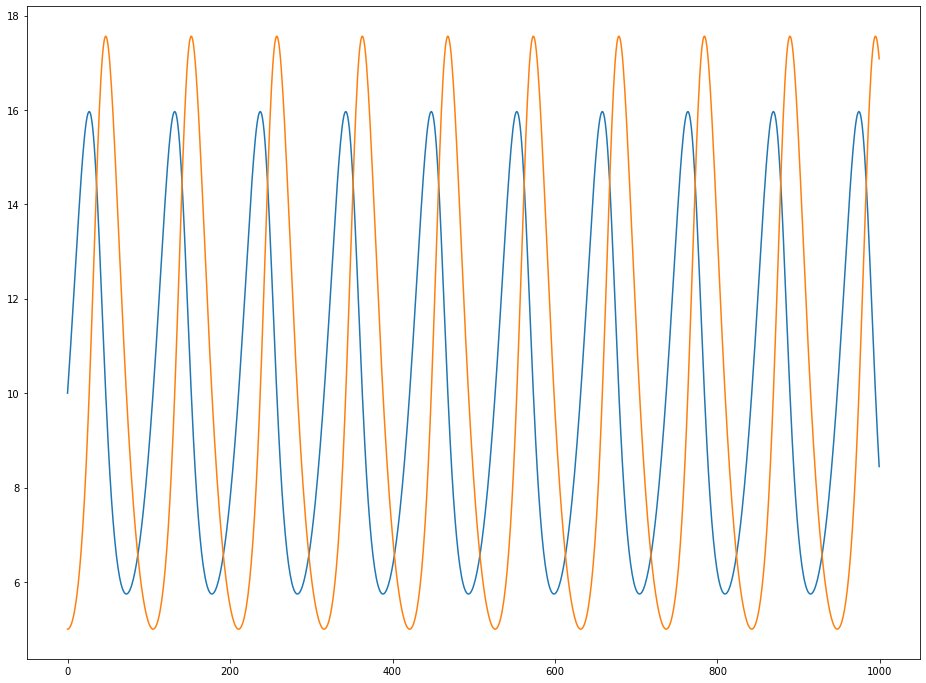

In [63]:
# Using parameters
#
# More efficient Lynx

# Named parameters are not possible at moment
# α, β, γ, ϵ
p=(1.,0.1,1.5,1.5)
ys=odeint(lv, np.array([10, 5]), np.linspace(0, 50, 1000), p )
plt.figure(figsize=(16, 12))
plt.plot(ys[:,0])
plt.plot(ys[:,1]);